# Analyse des données portant sur les étudiants américains diplomés entre 2010 et 2012

Pour ce projet, nous étudierons les résultats de l'enquête menée par American Community Survey portant sur les étudiants américains diplomés entre 2010 et 2012 (salaire, taux de chomage, travail à plein temps...).

Attention les résultats de l'enquête ont été regroupés par American Community Survey en fonction du domaine d'étude, ainsi la base de données étudiée comporte 173 lignes donc 173 domaines d'études. Par exemple si nous choisissons d'afficher les 5 salaires les plus élevés, il ne s'agira pas des 5 étudiants avec le salaire le plus élevé, mais des 5 domaines d'études ayant le salaire moyen - par étudiants diplomés dans ce domaine d'étude entre 2010 et 2012 - le plus élevé. Cette méthode de regroupement a ses défauts (comme rendre difficile la compréhension rapide des graphiques) mais permet aussi de pousser les recherches sur certains sujets (% de femmes par domaine d'étude que l'on peut croiser au salaire moyen par domaine d'étude ou avec le domaine d'étude qui embauche le plus...)

Ce projet n'a pas pour but de fournir une analyse poussée sur le système éducatif et le marché de l'emploi américain (bien que cela soit un projet qui m'a beaucoup interessé) mais d'utiliser mes connaissance en Pandas, Numpy et surtout Matplotlib pour créer mes premiers graphiques en autonomie

Extrait de la présentation de la base de données par Dataquest pour que vous compreniez mieux les graphiques qui vont suivre. Pour découvrir toutes les colonnes cliquez sur [ce lien](https://github.com/fivethirtyeight/data/tree/master/college-majors)

- Rank =  Rank by median earnings (the dataset is ordered by this column).
- Major_code = Major code.
- Major = Major description.
- Major_category = Category of major.
- Total = Total number of people with major.
- Sample_size = Sample size (unweighted) of full-time.
- Men = Male graduates.
- Women = Female graduates.
- ShareWomen = Women as share of total.
- Employed = Number employed.
- Median = Median salary of full-time, year-round workers.
- Low_wage_jobs = Number in low-wage service jobs.
- Full_time = Number employed 35 hours or more.
- Part_time = Number employed less than 35 hours.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline 

recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [2]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [3]:
raw_data_count = recent_grads.shape
print(raw_data_count)

(173, 21)


La base de données étudiée contenait initialement 173 lignes, soit 172 domaines d'étude et l'en-tête

In [4]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape
print(cleaned_data_count)

(172, 21)


Après avoir retiré les lignes composées d'une case vide ou plus, il reste 171 domaines d'étude à étudier

# Graphiques en "nuages de points" 

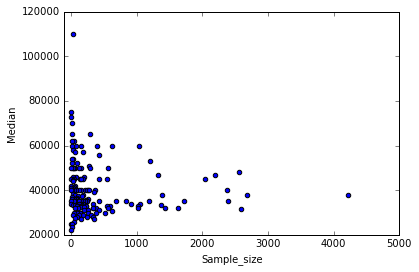

In [5]:
ax1 = recent_grads.plot(x="Sample_size",y="Median",kind = "scatter",xlim=(-100,5000),ylim=(20000,120000))

plt.show()

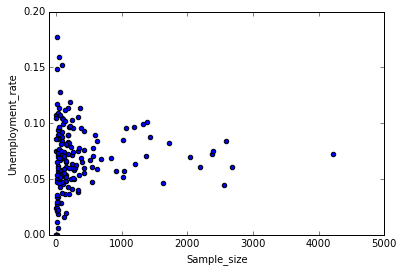

In [6]:
ax2 = recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind = "scatter",xlim=(-100,5000),ylim=(0,0.2))

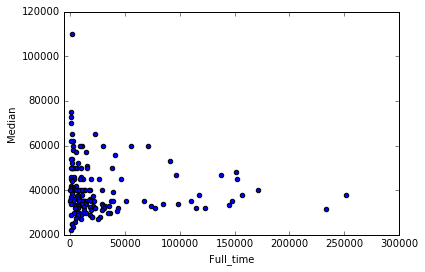

In [7]:
ax3 = recent_grads.plot(x="Full_time",y="Median",kind = "scatter",xlim=(-5000,300000),ylim=(20000,120000))

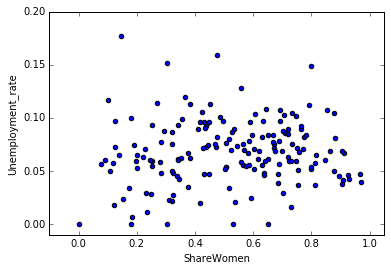

In [8]:
ax4 = recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind = "scatter",xlim=(-0.1,1.05),ylim=(-0.01,0.20))

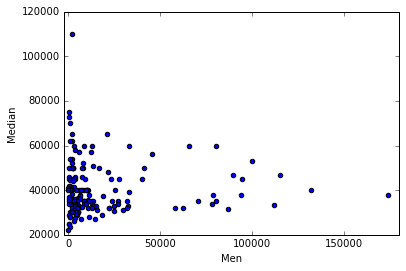

In [9]:
ax5 = recent_grads.plot(x="Men",y="Median",kind = "scatter",xlim=(-2000,180000),ylim=(20000,120000))

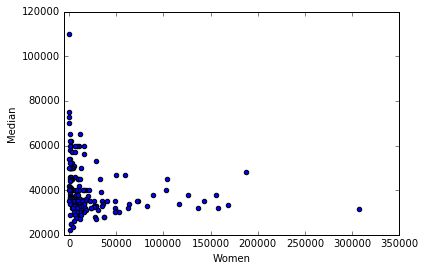

In [10]:
ax6 = recent_grads.plot(x="Women",y="Median",kind = "scatter",xlim=(-5000,350000),ylim=(20000,120000))

# Graphique en "histogrammes"

J'ai automatisé la création des graphiques pour ne pas perdre du temps à déclarer chaque graphique comme pour les graphiques en nuages de points. 

J'avais comme idéé d'afficher les 8 graphiques dans 8 volets sur la même image, mais c'était illisible donc je les ai affichés en 2 parties. Les 4 premiers graphiques sur ce premier volet, les 4 derniers sur le volet suivant

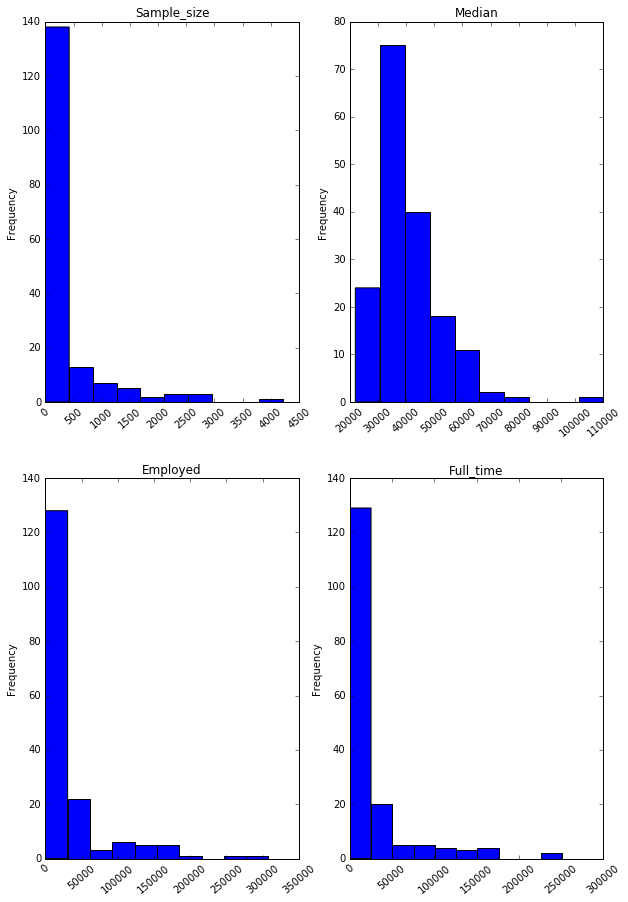

In [20]:
columns=["Sample_size","Median","Employed","Full_time","ShareWomen"
        ,"Unemployment_rate","Men","Women"]

fig = plt.figure(figsize=(10,15))
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)#+1 car range commence à 0, et qu'il n'est pas possible qu'un graphique soit positionné volet 0
    ax = recent_grads[columns[i]].plot(kind="hist",rot=40,title=columns[i])



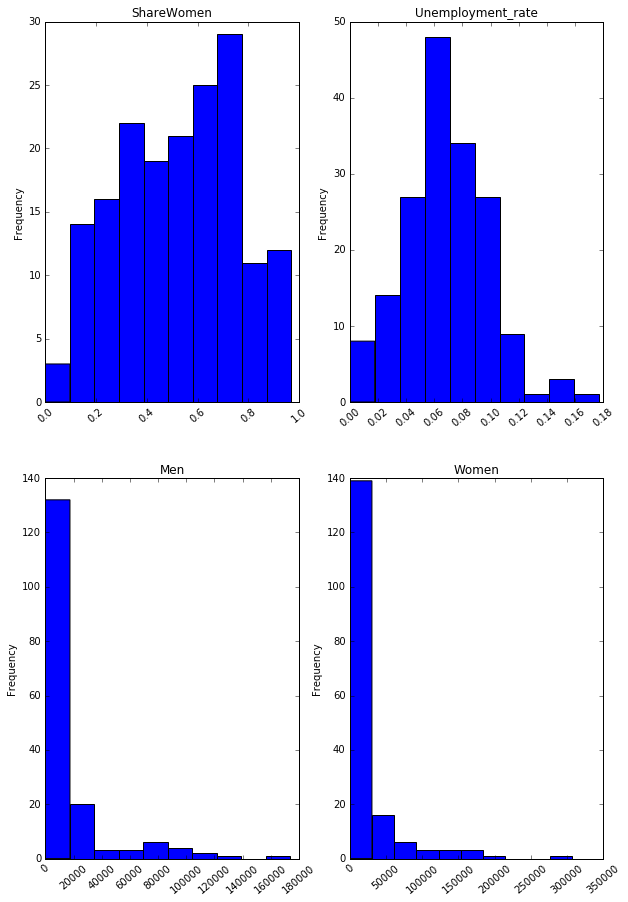

In [12]:
columns=["Sample_size","Median","Employed","Full_time","ShareWomen"
        ,"Unemployment_rate","Men","Women"]

fig = plt.figure(figsize=(10,15))
for i in range(4,8):
    ax = fig.add_subplot(2,2,i-3)
    ax = recent_grads[columns[i]].plot(kind="hist",rot=40,title=columns[i])

Une question bonus (donc sans correction ni aide apportée) que propose Dataquest est d'investiguer sur la répartition homme/femme par domaine d'étude, pour ensuite approfondir les recherches sur les domaines d'étude de prédilection par sexe, les domaines qui embauchent le plus etc. Je pouvais utiliser la colonne "ShareWomen" mais pour me challenger sur Pandas j'ai créé une nouvelle colonne "%male" qui représente le pourcentage d'étudiants masculins par domaine d'étude. 

PS : Ce n'était pas très utile car "ShareWomen" existait mais je reste assez fier pour le laisser :)

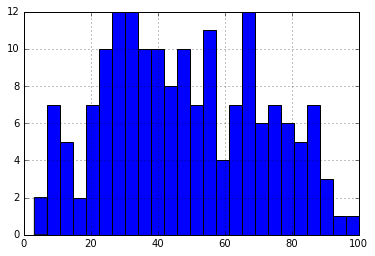

In [13]:
recent_grads["%male"] =( (recent_grads["Men"]*100)/
        (recent_grads["Total"]))
recent_grads['%male'].hist(bins=25)


Exemple de lecture : 10 domaines d'études sont composés à 40% d'étudiants masculins

# Graphiques "matrice de dispersion" 

Cette matrice est une fonctionnalité de Jupyter très pratique découverte durant le projet. Je vous laisse juger de la rapidité de codage et la clarté du résultat. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe382645e48>,
      dtype=object)

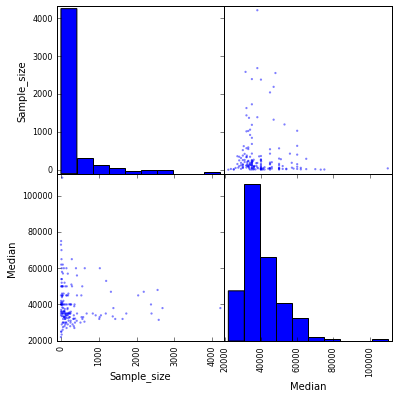

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size","Median"]],figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3823c97f0>,
      dtype=object)

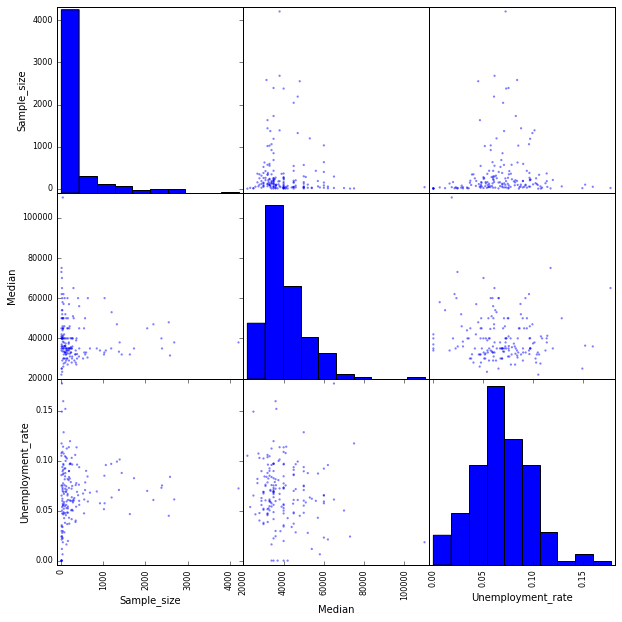

In [15]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe381fab160>,
      dtype=object)

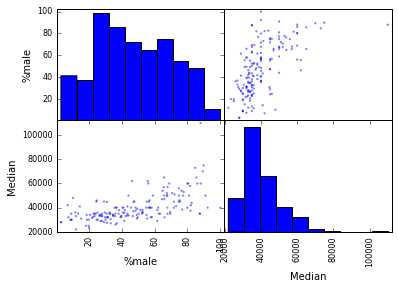

In [16]:
scatter_matrix(recent_grads[["%male","Median"]])

# Graphique " en barres"

Dans le graphique ci-dessous nous analysons les 10 domaines d'études les moins priviligés par les étudiantes, puis les 10 domaines privilégiés par les étudiantes. 

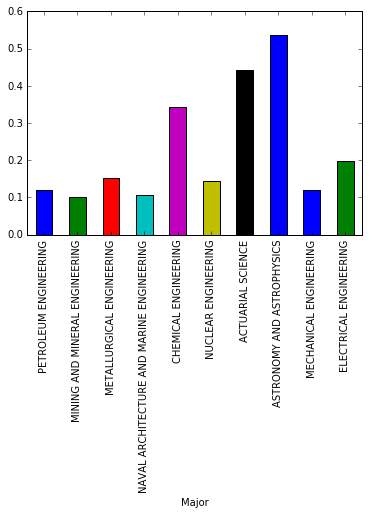

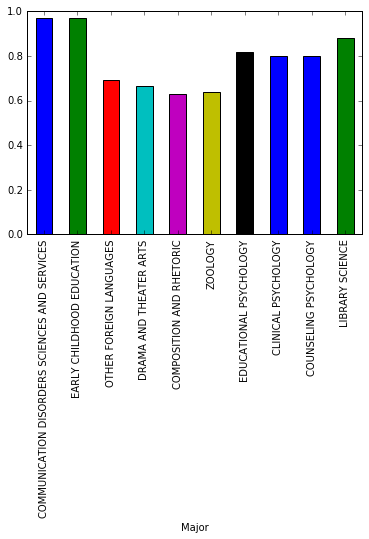

In [17]:
recent_grads[:10].plot.bar(x="Major",y="ShareWomen", legend=False)
recent_grads[162:].plot.bar(x="Major",y="ShareWomen", legend=False)

Dans le graphique ci-dessous nous analysons les 10 domaines d'étude avec le taux de chomage à la sortie le plus faible puis les 10 domaines avec le taux de chomage à la sortie le plus élevé. On peut remarquer que les étudiantes sont sous-représentées dans les domaines d'études qui embauchent le plus, et à l'inverse sur-représentées dans les domaines qui embauchent le moins. 

Ex : Le domaine d'étude "Clinical Psychology" est composé à 80% d'étudiantes. Le chomage à la sortie du ce domaine d'étude est le plus élevé à savoir 15%. 

Attention je ne tire aucune analyse de ces résultats qui sont la partie émergée de l'iceberg. Il faudrait investiguer plus profondement (distribution du salaire médian entre homme et femme par domaine d'étude par exemple)

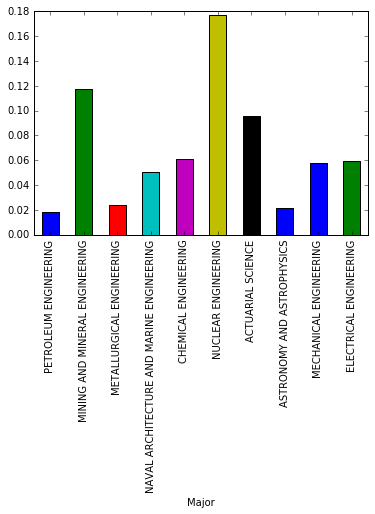

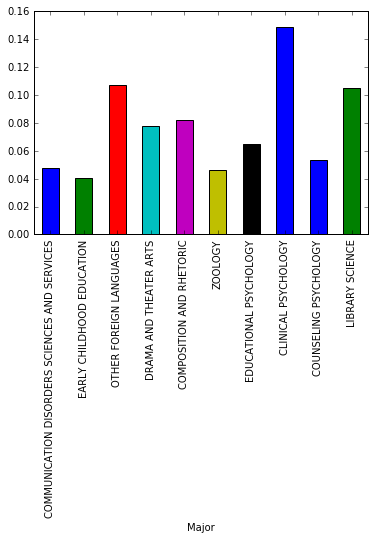

In [19]:
recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate", legend = False)
recent_grads[162:].plot.bar(x="Major", y="Unemployment_rate", legend = False)

J'ai pris beaucoup de plaisir à réaliser ce projet que j'ai trouvé beaucoup plus simple que le dernier projet. Je me sens aussi plus à l'aise avec Pandas et Numpy. 

J'entame plus sereinement le 5ème chapitre " Storytelling Trough Data Visualisation" qui semble se concentrer sur l'aspect visuel des graphiques et les " Conditional Plots"